In [1]:
import sys
sys.path.insert(0, '..')
from helpers.timing import timed, compare

import numpy as np
from functools import lru_cache
from matplotlib import pyplot as plt
import math

# Числа Фибоначчи
Числа Фибоначчи — элементы числовой последовательности 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, … (последовательность A000045 в OEIS), в которой первые два числа равны 0 и 1, а каждое последующее число равно сумме двух предыдущих чисел. Названы в честь средневекового математика Леонардо Пизанского (известного как Фибоначчи).
## Объявление функций
- Рекурсия. Решаем задачу в лоб с помощью рекурсии. Таким образом одно и то же значение подсчитывается по несколько раз. Чем  большое число мы передадим, тем дольше он будет считать. Экспоненциальная скорость роста.
- Кэш. Вместо того, чтобы с нуля подсчитывать предыдущие два значения, сохраним уже вычисленные значение в кэш. Из него мы и будем брать предыдущие значения, если они были подсчитаны, в противном случае значение вычисляется и сохраняется в кэш.
- Итерации. Функция с рекурсией может упасть в ошибку, если на вход подать большое число. В языке Python есть ограничение на количество рекурсий. Перепишем функцию под итерации, сохраняя значения предыдущих двух элементов, чтобы не было выполнения одних и тех же вызовов, как в рекурсии. Получим динамическое программирование.
- Формула. Можно вычислить число Фибоначчи с помощью формулы. В ней есть корень и деление, поэтому при операциях над большими числами с плавающей запятой возможны проблемы с точностью!

In [2]:
def get_recurs_fib(n):
    assert n >= 0
    return n if n <= 1 else get_recurs_fib(n - 1) + get_recurs_fib(n - 2)

In [3]:
cache = {}
def get_cache_fib(n):
    assert n >= 0
    if n not in cache:
        cache[n] = n if n <= 1 else get_cache_fib(n - 1) + get_cache_fib (n - 2)
    return cache[n]

In [4]:
def get_iter_fib(n):
    assert n >= 0 
    prev, curr = 0, 1
    for i in range(n - 1):
        prev, curr = curr, prev + curr
    return curr

In [5]:
def memo(f):
    cache = {}
    def inner(n):
        if n not in cache:
            cache[n] = f(n)
        return cache[n]
    return inner

In [6]:
get_recurs_cache_fib = memo(get_recurs_fib)

In [7]:
get_iter_cache_fib = memo(get_iter_fib)

In [8]:
get_recurs_cache_fib_v2 = lru_cache(maxsize = None)(get_recurs_fib)

In [9]:
def get_formula_fib(n):
    return math.floor(1 / np.sqrt(5) * (((1 + np.sqrt(5)) / 2) ** n - ((1 - np.sqrt(5)) / 2) ** n))

In [10]:
i = 80
print(f'Хотим найти {i}-ое число Фибоначчи')
print(f'Число Фибоначчи, найденное с помощью итераций: {get_iter_fib(i)}')
print(f'Число Фибоначчи, найденное с помощью формулы: {get_formula_fib(i)}')

Хотим найти 80-ое число Фибоначчи
Число Фибоначчи, найденное с помощью итераций: 23416728348467685
Число Фибоначчи, найденное с помощью формулы: 23416728348467744


Число Фибоначчи, полученные с помощью итераций и формулы, отличаются. Как мы видим, нахождение числа Фибоначчи с помощью формулы может привести к неточности из-за операций над большими числами с плавающей запятой.

In [11]:
fib_methods = {
    'recurs': get_recurs_fib,
    'cache': get_cache_fib,
    'iter': get_iter_fib,
    'recurs_cache': get_recurs_cache_fib,
    'iter_cache': get_iter_cache_fib,
    'formula': get_formula_fib
}
def get_fib(n, method):
    return fib_methods[method](n)

## Задачи на программирование
### Небольшое число Фибоначчи
Дано целое число $1 \le n \le 40$, необходимо вычислить $n$-е число Фибоначчи (напомним, что $F_0=0$, $F_1=1$ и $F_n=F_{n-1}+F_{n-2}$ при $n \ge 2$).

In [12]:
n = 29
for method in fib_methods:
    print(method, get_fib(n, method))

recurs 514229
cache 514229
iter 514229
recurs_cache 514229
iter_cache 514229
formula 514229


### Последняя цифра $n$-го числа Фибоначчи
Дано число $1 \le n \le 10^7$, необходимо найти последнюю цифру $n$-го числа Фибоначчи.

Как мы помним, числа Фибоначчи растут очень быстро, поэтому при их вычислении нужно быть аккуратным с переполнением. В данной задаче, впрочем, этой проблемы можно избежать, поскольку нас интересует только последняя цифра числа Фибоначчи: если $0 \le a,b \le 9$ — последние цифры чисел $F_i$ и $F_{i+1}$ соответственно, то $(a+b) \bmod{10} $ — последняя цифра числа $F_{i+2}$.

In [13]:
def get_iter_fib_digit(n):
    assert n >= 0 
    f0, f1 = 0, 1
    for i in range(n - 1):
        f0, f1 = np.mod(f1, 10), np.mod(f0 + f1, 10)
    return f1

In [14]:
get_iter_fib_digit(25)

5

### Огромное число Фибоначчи по модулю
Даны целые числа $1 \le n \le 10^{18}$ и $2 \le m \le 10^5$, необходимо найти остаток от деления $n$-го числа Фибоначчи на $m$.

__Решение:__ Задачу можно решить с помощью периода Пизано $\pi (m)$ — это длина периода последовательности Фибоначчи по модулю заданного натурального числа $m$. Последовательность Фибоначчи по модулю любого натурального числа $m$ периодична.


Определение $\pi (m)$ при $m=4$

|i| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7  | 8  | 9  | 10 | 11 | 12  | 13  | 14  | 15  | 16  | 17   | 18   | … |
|--|---|---|---|---|---|---|---|----|----|----|----|----|-----|-----|-----|-----|-----|------|------|---|
| $F_{i}$       | 0 | 1 | 1 | 2 | 3 | 5 | 8 | 13 | 21 | 34 | 55 | 89 | 144 | 233 | 377 | 610 | 987 | 1597 | 2584 | … |
| $F_{i}\mod m$ | __0__ | __1__ | __1__ | __2__ | __3__ | __1__ | 0 | 1  | 1  | 2  | 3  | 1  | 0   | 1   | 1   | 2   | 3   | 1    | 0    | … |


In [15]:
def get_pisano_period(m, n):
    assert m > 0
    assert n > 0  
    
    period, i = [0, 1], 2
    while not (period[i - 2] == 0 and period[i - 1] == 1) or i <= 2:
        period.append((period[i - 2] + period[i - 1]) % m)
        i += 1
    return (period[n % (i - 2)])


#def main():
#    n, m = map(int, input().split())
#    print(get_pisano_period(n, m))
#
#if __name__ == "__main__":
#    main()

In [16]:
get_pisano_period(133, 6)

8

## Замеры быстродействия

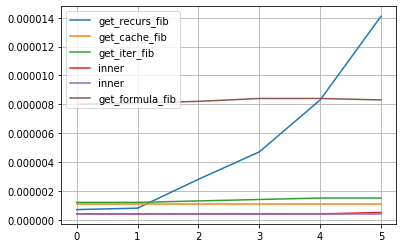

In [17]:
n = 6
compare(fib_methods.values(), np.arange(n), unpack_array=False)

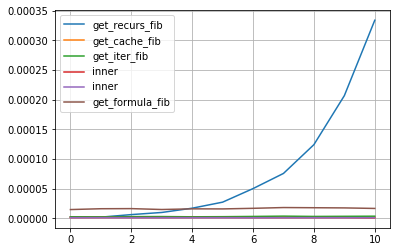

In [18]:
n = 11
compare(fib_methods.values(), np.arange(n), unpack_array=False)

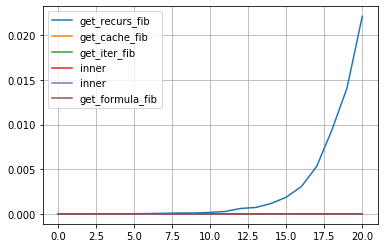

In [19]:
n = 21
compare(fib_methods.values(), np.arange(n), unpack_array=False)

Рекурсия при значениях больше 5 начинает работать значительно медленее остальных методов.